#S09 T02: Aprenentatge Supervisat - Regressions


Anem a practicar i a familiaritzar-nos amb regressions
## Nivell 1

### - Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.


In [218]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
#from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#import statsmodels.api as sm
#import statsmodels.formula.api as smf


ImportError: cannot import name 'DecisionTreeRegressor' from 'sklearn.linear_model' (/home/marcr/Documents/itacademy/Supervitat_Regressio/.venv/lib64/python3.10/site-packages/sklearn/linear_model/__init__.py)

In [171]:
file="DelayedFlights.csv"
df_orig = pd.read_csv(file,low_memory=False,index_col=0)
df_orig.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [172]:
df_orig.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [173]:
df=df_orig.sample(n=2000)


    Year -> any de la dada format yyyy
    Month -> mes de la dada format mm
    DayofMonth -> dia del mes 1-31
    DayOfWeek -> dia de la setmana 1 (Monday) - 7 (Sunday)
    DepTime -> hora de sortida (local, hhmm)
    CRSDepTime -> hora programada de sortida (local, hhmm)
    ArrTime -> hora de arrivada (local, hhmm)
    CRSArrTime -> hora programda de arrivada (local, hhmm)
    UniqueCarrier -> identificador del operador
    FlightNum -> numero de vol
    TailNum -> matricula del avio
    ActualElapsedTime -> temps de vol total en minuts
    CRSElapsedTime -> temps estimat de vol total en minutos
    AirTime -> temps en el aire en minuts
    ArrDelay -> Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
    DepDelay -> Difference in minutes between scheduled and actual departure time.Early departures show negative numbers, in minutes
    Origin -> codi IATA areoport de origen
    Dest -> codi IATA aeroport de dest
    Distance -> distancia entre aeroports (miles)
    TaxiIn -> Wheels down and arrival at the destination airport gate, in minutes
    TaxiOut -> The time elapsed between departure from the origin airport gate and wheels off, in minutes
    Cancelled -> vol cancelat o no
    CancellationCode -> motiu de la cancelacio (A = carrier, B = weather, C = NAS, D = security)
    Diverted -> Desviat 1 = yes, 0 = no
    CarrierDelay -> Retràs degut a l'operador in minutes
    WeatherDelay -> Retràs degut al temps in minutes
    NASDelay -> Retràs degut a NAS in minutes
    SecurityDelay -> Retràs degut motius de seguretat in minutes
    LateAircraftDelay -> Retràs acumulat de l'avió in minutes


Deveriamos eliminar los vuelos cancelados y Redirigidos ya que afectarian a nuestra prediccion

In [174]:
print(pd.value_counts(df.Cancelled))
print(pd.value_counts(df.Diverted))

0    1999
1       1
Name: Cancelled, dtype: int64
0    1994
1       6
Name: Diverted, dtype: int64


Eliminamos los cancelados y desviado para evitar que interfiran en la predicion

In [175]:
df = df.loc[(df.Cancelled == 0) & (df.Diverted == 0 )]
df.isna().sum()

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime                0
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
TailNum                0
ActualElapsedTime      0
CRSElapsedTime         0
AirTime                0
ArrDelay               0
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                 0
TaxiOut                0
Cancelled              0
CancellationCode       0
Diverted               0
CarrierDelay         673
WeatherDelay         673
NASDelay             673
SecurityDelay        673
LateAircraftDelay    673
dtype: int64

Tenemos algunos delays sin valor, supondremos que el valor es 0 por eso no esta instanciado asi que los instanciaremos a 0

In [176]:
for column in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','SecurityDelay','LateAircraftDelay']:
    df[column]=df[column].fillna(0)
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Seleccionamos las columnas con retraso

In [177]:
df = df.loc[df['ArrDelay']>0] 

Eliminamos algunas columnas que no usuaremos 

In [178]:
df.drop(['Year', 'DayofMonth','CRSDepTime','CRSArrTime','DepTime','Cancelled','CancellationCode','Diverted'], axis=1, inplace=True)
corrMatrix = df.corr()
corrMatrix

,Month,DayOfWeek,ArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,-0.001035,0.034547,0.020847,-0.036240,-0.021700,-0.022794,0.017792,0.037354,-0.025573,-0.001669,-0.068124,0.006677,0.026520,-0.011370,0.037826,0.008144
DayOfWeek,-0.001035,1.000000,0.021137,-0.023461,0.050256,0.050038,0.044522,-0.012449,-0.014975,0.045906,0.024032,0.029662,0.015067,0.020929,-0.022073,0.024963,-0.033409
ArrTime,0.034547,0.021137,1.000000,0.007868,-0.012146,-0.005574,-0.012104,-0.001357,0.006888,-0.019543,0.070465,-0.026077,0.007328,-0.024269,0.065839,-0.004253,-0.046149
FlightNum,0.020847,-0.023461,0.007868,1.000000,-0.319746,-0.337778,-0.340982,0.096638,0.090180,-0.358814,-0.026770,0.028105,0.076312,0.046204,0.070474,0.000964,-0.010116
ActualElapsedTime,-0.036240,0.050256,-0.012146,-0.319746,1.000000,0.968817,0.973979,0.075572,0.008729,0.950914,0.199519,0.287488,0.006335,0.026063,0.184823,-0.003398,-0.054051
CRSElapsedTime,-0.021700,0.050038,-0.005574,-0.337778,0.968817,1.000000,0.984990,0.000970,0.006596,0.982852,0.141837,0.110343,0.001797,0.010144,0.050786,-0.003926,-0.047966
AirTime,-0.022794,0.044522,-0.012104,-0.340982,0.973979,0.984990,1.000000,0.010054,-0.008329,0.979520,0.121907,0.074056,0.002923,0.006228,0.077164,-0.000878,-0.054627
ArrDelay,0.017792,-0.012449,-0.001357,0.096638,0.075572,0.000970,0.010054,1.000000,0.956344,-0.015783,0.140013,0.265005,0.515588,0.307063,0.446462,0.080857,0.501572
DepDelay,0.037354,-0.014975,0.006888,0.090180,0.008729,0.006596,-0.008329,0.956344,1.000000,-0.009473,0.070812,0.055185,0.534992,0.301977,0.300743,0.084266,0.535073
Distance,-0.025573,0.045906,-0.019543,-0.358814,0.950914,0.982852,0.979520,-0.015783,-0.009473,1.000000,0.110799,0.060675,-0.006590,0.007686,0.027228,-0.001444,-0.045750


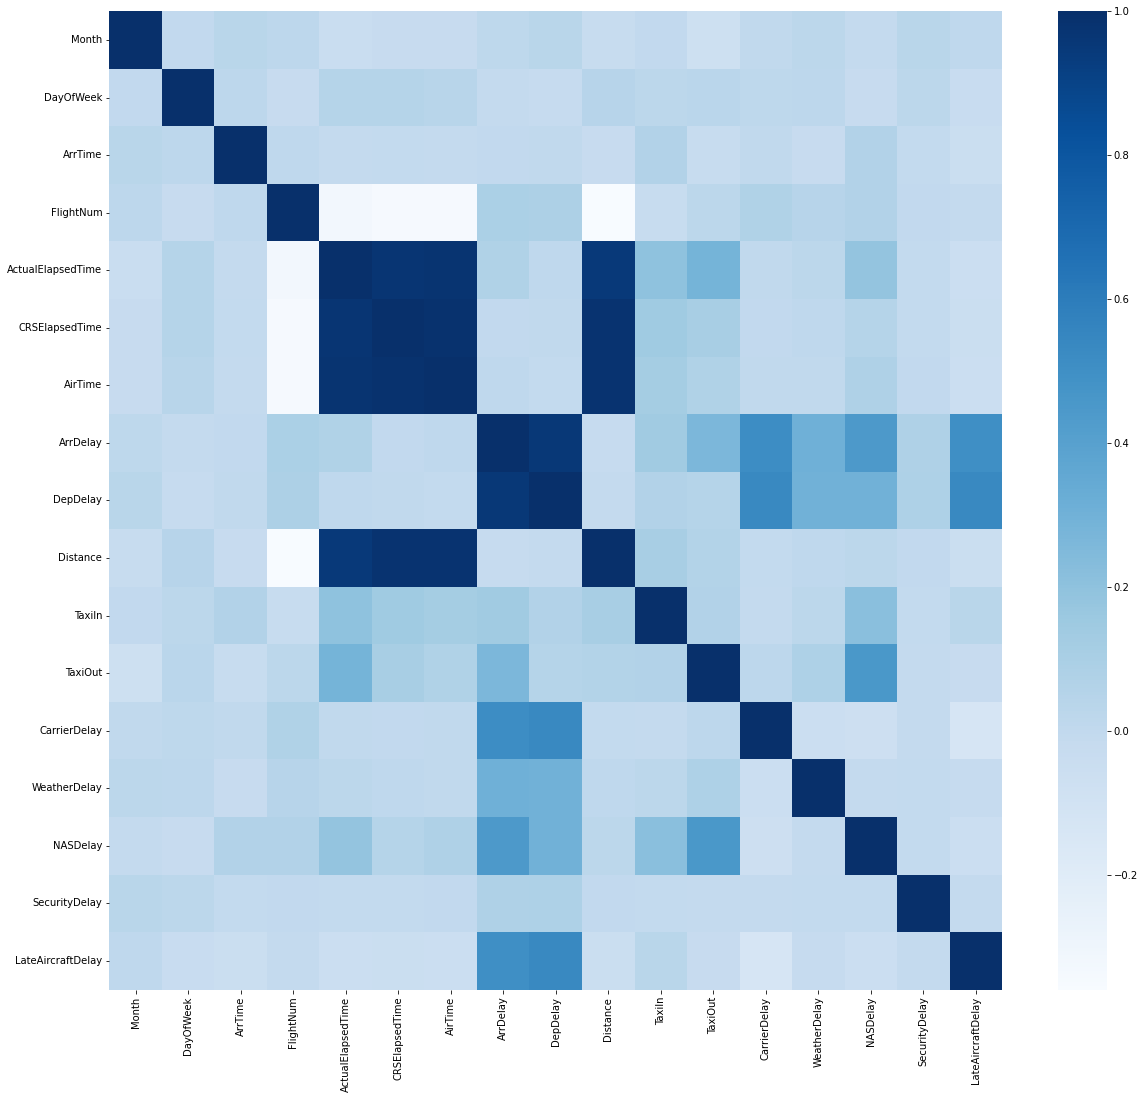

In [179]:
plt.figure(figsize=(20,18))
sns.heatmap(corrMatrix,  cmap=plt.cm.Blues)
plt.show()

In [180]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'], dtype='object')

In [181]:
df['ArrDelay']

1335382      4.0
5434628      5.0
4433073     59.0
2756121     52.0
5868637     34.0
           ...  
5005526    107.0
6474695     25.0
1713947    379.0
304103     203.0
1254194     24.0
Name: ArrDelay, Length: 1791, dtype: float64

In [182]:
def get_stats(group):
    return {'count': group.count(),'mean': group.mean()}

UniqueCarrier_delay_stats = df['ArrDelay'].groupby(df['UniqueCarrier']).apply(get_stats).unstack()
UniqueCarrier_delay_stats = UniqueCarrier_delay_stats.sort_values('count')
UniqueCarrier_delay_stats


,count,mean
UniqueCarrier,,
HA,6.0,28.333333
F9,26.0,23.961538
AS,32.0,54.937500
B6,42.0,63.857143
9E,48.0,48.875000
OH,61.0,60.295082
EV,68.0,59.617647
FL,68.0,51.602941
YV,78.0,56.487179


In [183]:
UniqueCarrier_delay_stats = df['ArrDelay'].groupby(df['Dest']).apply(get_stats).unstack()
UniqueCarrier_delay_stats = UniqueCarrier_delay_stats.sort_values('count')
UniqueCarrier_delay_stats

,count,mean
Dest,,
YUM,1.0,8.000000
MOB,1.0,3.000000
MLI,1.0,4.000000
CMI,1.0,37.000000
COD,1.0,12.000000
...,...,...
LAX,52.0,40.942308
EWR,58.0,64.362069
DFW,65.0,66.907692


In [184]:
UniqueCarrier_delay_stats = df['ArrDelay'].groupby(df['Origin']).apply(get_stats).unstack()
UniqueCarrier_delay_stats = UniqueCarrier_delay_stats.sort_values('count')
UniqueCarrier_delay_stats

,count,mean
Origin,,
ABI,1.0,21.000000
CWA,1.0,7.000000
FAI,1.0,183.000000
FAR,1.0,16.000000
FAT,1.0,12.000000
...,...,...
LAX,53.0,51.037736
DEN,64.0,40.640625
DFW,87.0,37.195402


In [185]:

df.drop(['UniqueCarrier','TailNum','Origin','Dest'], axis=1, inplace=True)


In [186]:
df['ElapsedDelay']=df.ActualElapsedTime-df.CRSElapsedTime
df.drop(['ActualElapsedTime', 'CRSElapsedTime'], axis=1, inplace=True)


In [187]:
corr = df[df.columns[1:]].corr()['ArrDelay'][:]
corr.sort_values(ascending=False).head(n=10)

ArrDelay             1.000000
DepDelay             0.956344
CarrierDelay         0.515588
LateAircraftDelay    0.501572
NASDelay             0.446462
WeatherDelay         0.307063
ElapsedDelay         0.301140
TaxiOut              0.265005
TaxiIn               0.140013
FlightNum            0.096638
Name: ArrDelay, dtype: float64

In [188]:
df.columns
df.head()

,Month,DayOfWeek,ArrTime,FlightNum,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ElapsedDelay
1335382,3,5,1553.0,5312,114.0,4.0,6.0,773,2.0,16.0,0.0,0.0,0.0,0.0,0.0,-2.0
5434628,10,6,1420.0,2274,122.0,5.0,6.0,912,4.0,8.0,0.0,0.0,0.0,0.0,0.0,-1.0
4433073,8,1,1807.0,5417,26.0,59.0,65.0,109,5.0,10.0,59.0,0.0,0.0,0.0,0.0,-6.0
2756121,5,4,1122.0,508,127.0,52.0,17.0,738,9.0,24.0,0.0,0.0,52.0,0.0,0.0,35.0
5868637,10,1,2304.0,2039,149.0,34.0,48.0,1197,7.0,15.0,4.0,0.0,0.0,0.0,30.0,-14.0



Multicolinealitat 
La multicolinealidad (o colinealidad) ocurre cuando una variable independiente en un modelo de regresión se correlaciona linealmente con otra variable independiente.
Un método simple para detectar la multicolinealidad en un modelo es usar algo llamado factor de inflación de la varianza o el VIF para cada variable de predicción.

El VIF mide la relación entre la varianza de un coeficiente de regresión dado con solo esa variable en el modelo y la varianza de un coeficiente de regresión dado con todas las variables del modelo.

Un VIF de 1 (el VIF mínimo posible) significa que el predictor probado no está correlacionado con los otros predictores. Un VIF de 1 (el VIF mínimo posible) significa que el predictor probado no está correlacionado con los otros predictores.

Cuanto mayor sea el VIF,

    Cuanto más correlacionado esté un predictor con los otros predictores
    Cuanto más se infla el error estándar
    Cuanto mayor sea el intervalo de confianza
    Es menos probable que un coeficiente se evalúe como estadísticamente significativo.


In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(['ArrDelay'],axis=1)
y = df.ArrDelay.values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [190]:

vif_data[~vif_data.isin([np.inf]).any(1)]

,feature,VIF
0,Month,3.760752
1,DayOfWeek,4.512462
2,ArrTime,7.539216
3,FlightNum,2.499031
4,AirTime,107.229853
5,DepDelay,416.283165
6,Distance,90.977955
7,TaxiIn,3.172933
8,TaxiOut,5.650503
9,CarrierDelay,125.025894


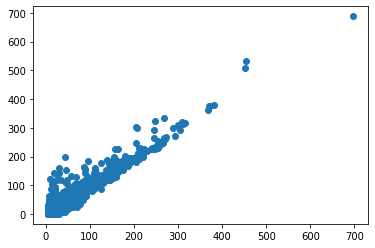

In [191]:
# Represento los datos generados

X = df.DepDelay.values
y = df.ArrDelay.values
plt.scatter(X, y)
plt.show()

In [192]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X.reshape(-1,1),
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [193]:

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

Coeficiente beta1: [0.99466321]
Intercept: [0.86506473]
Error cuadrático medio: 306.60
Estadístico R_2: 0.91


In [194]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[11.80636007]
 [58.5555311 ]
 [27.72097149]]

El error (rmse) de test es: 16.563808903842517


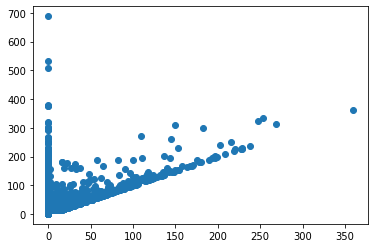

In [195]:

X = df.LateAircraftDelay.values
y = df.ArrDelay.values
plt.scatter(X, y)
plt.show()



In [196]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.reshape(-1,1),
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

Coeficiente beta1: [0.78819828]
Intercept: [34.0487712]
Error cuadrático medio: 2353.53
Estadístico R_2: 0.27


In [198]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



[[34.0487712 ]
 [77.39967683]
 [34.0487712 ]]

El error (rmse) de test es: 61.07382244549639


In [205]:
X = df[['LateAircraftDelay','DepDelay']]
y = df.ArrDelay.values
X.shape

(1791, 2)

In [206]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))



Coeficiente beta1: [-0.03930111  1.01002   ]
Intercept: [0.84920151]
Error cuadrático medio: 305.12
Estadístico R_2: 0.91


In [207]:

# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


[[11.95942147]
 [57.26880004]
 [28.11974142]]

El error (rmse) de test es: 16.700129129359368


### - Exercici 2

Compara’ls en base al MSE i al R2 .

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [216]:
X = df[['LateAircraftDelay','DepDelay','AirTime','Distance','NASDelay','CarrierDelay','WeatherDelay']]
y = df.ArrDelay.values


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 1)
X_train_p = poly_reg.fit_transform(X_train)
modelo = LinearRegression()
modelo.fit(X = X_train_p, y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train_p)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

Coeficiente beta1: [ 0.          0.73104534  0.23968035  0.08628118 -0.01065363  0.80313353
  0.74344992  0.76037811]
Intercept: [0.97977447]
Error cuadrático medio: 42.78
Estadístico R_2: 0.99


In [224]:
X = df.LateAircraftDelay.values
y = df.ArrDelay.values

X_train, X_test, y_train, y_test = train_test_split(
                                        X.reshape(-1,1),
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


modelo = HuberRegressor(max_iter=1000)
modelo.fit(X = X_train.reshape(-1,1), y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

Coeficiente beta1: 0.879814583630972
Intercept: 18.242666267472355
Error cuadrático medio: 2565.00
Estadístico R_2: 0.21


/home/marcr/Documents/itacademy/Supervitat_Regressio/.venv/lib64/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:


# max_depth, int, default=None
# min_samples_split int or float, default=2

DTR2 = DecisionTreeRegressor(random_state = 0,
                            criterion = "poisson",
                            splitter = "best",
                            )

DTR2.fit(X_train, y_train)

y_predDTR2 = DTR2.predict(X_test)

mae_DTR2 = mean_absolute_error(y_test, y_predDTR2)
mse_DTR2 = mean_squared_error(y_test, y_predDTR2)

print('Suppport Vector Regression Accuracy: ', DTR2.score(X_test,y_test))
print('R2 square:', r2_score(y_test, y_predDTR))
print('maeDTR: ', mae_DTR2)
print('mseDTR: ', mse_DTR2)



### - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

## Nivell 2

### - Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [208]:
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()


InvalidIndexError: (slice(None, None, None), 0)


## Nivell 3

### - Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

https://datapeaker.com/big-data/principales-bibliotecas-de-python-para-el-procesamiento-de-imagenes-en-2021/
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
